In [1]:
import numpy as np 
import pandas as pd

In [2]:
df =pd.read_excel("Tips Quick EDA exercise v0.1 (5).xlsx")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


### 1) What is the overall average tip?

In [3]:
df.tip.mean()

2.9982786885245902

### 2) Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [4]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [5]:
Diff = df.tip.mean() - df.tip.median()
Diff

0.09827868852459032

#### Mean of tip is 2.998279 and the median of the tip is 2.900000, the difference between both of mean and median is 0.098278688
#### From the above we can observe that mean and the median not so much different so the " Distribution is symmetric and have zero skewness."

### 3) Prepare a boxplot for 'tip', are there any outliers?

In [6]:
boxplot1 = df.boxplot(column=["tip"])
boxplot1

#### From the above boxplot we can observe that they are some outliers

### 4) Prepare a boxplot for 'total_bill', are there any outliers?

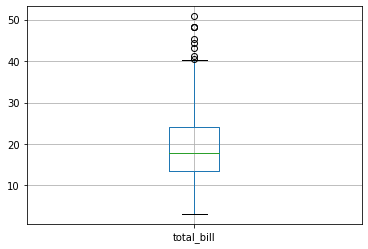

In [7]:
boxplot2 = df.boxplot(column=["total_bill"])
boxplot2

#### From the above boxplot we can observe that they are some outliers

### 5) Gender: what is the percent of females in the data? 

In [8]:
(df.groupby('sex').size()/df['sex'].count())*100

sex
0.35655737704918034     0.408163
Female                 35.510204
Male                   64.081633
dtype: float64

#### The percent of womens in the data are 35.5%

### 6) Prepare a bar plot with the bars representing the percentage of records for each gender.

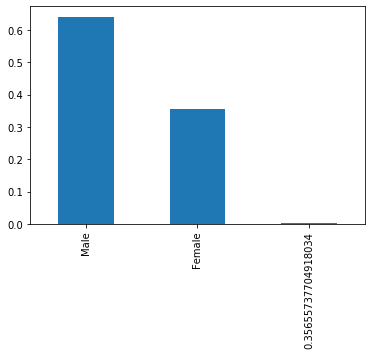

In [9]:
df['sex'].value_counts("Male","Female").plot(kind='bar')

### 7) Does the average tip differ by gender? Does one gender tip more than the other?

In [10]:
df.groupby('sex')['tip'].mean()

sex
0.35655737704918034         NaN
Female                 2.833448
Male                   3.089618
Name: tip, dtype: float64

#### Yes the average tip differ by gender and the "Male average tip is more the Female average tip".

### 8) Does the average tip differ by the time of day?

In [11]:
df.groupby('time')['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

#### Yes the average tip differ by time and the "Dinner average tip is more the Lunch average tip".

### 9) Does the average tip differ by size (number of people at the table)? 

In [12]:
df.groupby('size')['tip'].mean()

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

#### Yes the average tip differ by size and as the number of people increases the tip also increases but for the size 4 to size 5 the tip decreased.
#### We can conclude that as the size increases the tip increases but for the size 4 to 5 it decreased.

### 10) Do smokers tip more than non-smokers?

In [13]:
df.groupby('smoker')['tip'].mean()

smoker
0.6188524590163934         NaN
No                    2.991854
Yes                   3.008710
Name: tip, dtype: float64

#### Yes the smoker tip more than the non-smoker

### 11) Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [14]:
df.groupby(['sex','smoker'])['tip'].mean()

sex                  smoker            
0.35655737704918034  0.6188524590163934         NaN
Female               No                    2.773519
                     Yes                   2.931515
Male                 No                    3.113402
                     Yes                   3.051167
Name: tip, dtype: float64

#### From the above result observed that the "Male Non-Smoker tips the most"

### 12) Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [15]:
df["pct_tip"] = df["tip"]/df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808
...,...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2.0,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2.0,0.159744


### 13) Does pct_tip differ by gender? Does one gender tip more than the other?

In [16]:
df.groupby('sex')['pct_tip'].mean()

sex
0.35655737704918034         NaN
Female                 0.166491
Male                   0.157651
Name: pct_tip, dtype: float64

#### Yes the pct_tip differ by gender and the "Female pct_tip is more the Male pct_tip".

### 14) Does pct_tip differ by size (number of people at the table)? 

In [17]:
df.groupby('size')['pct_tip'].mean()

size
1.0    0.217292
2.0    0.165719
3.0    0.152157
4.0    0.145949
5.0    0.141495
6.0    0.156229
Name: pct_tip, dtype: float64

#### Yes the pct_tip differ by the size as the size increases the pct_tip decreases.

### 15) Make the gender vs. smoker view using pct_tip  - does your inference change?

In [18]:
df.groupby(['sex','smoker'])['pct_tip'].mean()

sex                  smoker            
0.35655737704918034  0.6188524590163934         NaN
Female               No                    0.156921
                     Yes                   0.182150
Male                 No                    0.160669
                     Yes                   0.152771
Name: pct_tip, dtype: float64

#### From the above result observed that "Female Smoker pct_tip has highest value."

### 16) Make a scatter plot of total_bill vs. tip.

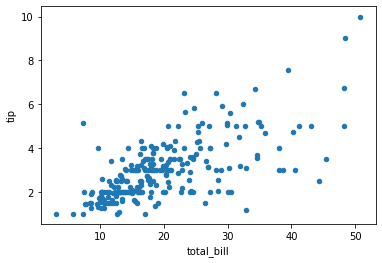

In [19]:
df.plot.scatter(x='total_bill',y='tip')

### 17) Make a scatter plot of total_bill vs. pct_tip.

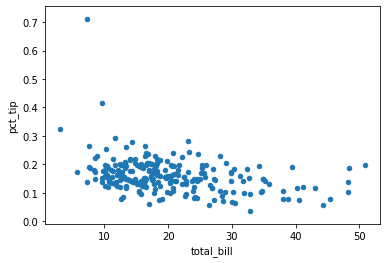

In [20]:
df.plot.scatter(x='total_bill',y='pct_tip')